# Numerical Exercise 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import activations

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


2024-06-20 09:22:06.712498: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

# RESTART THE KERNEL EACH TIME YOU RUN THIS NOTEBOOK
and be sure to have enough memory available if running with CUDA. 


## Resolution



In [2]:
N_epochs = 60
N_train = 10000 # <<< train
N_valid = 1000 # <<< test
sigma = 0.3

def f(x, y):
    return np.sin((x ** 2 + y ** 2))

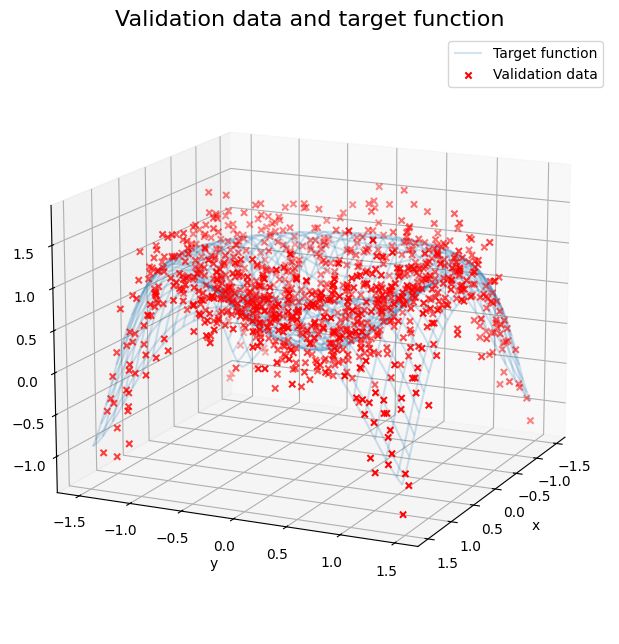

In [3]:
x_train = np.random.uniform(-3./2., 3./2., N_train)
x_valid = np.random.uniform(-3./2., 3./2., N_valid)

y_train = np.random.uniform(-3./2., 3./2., N_train)
y_valid = np.random.uniform(-3./2., 3./2., N_valid)

pair_train = np.column_stack((x_train,y_train))
pair_valid = np.column_stack((x_valid,y_valid))

z_target = f(x_valid, y_valid)
z_train = np.random.normal(f(x_train,y_train), sigma)
z_valid = np.random.normal(f(x_valid,y_valid), sigma)

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-3./2., 3./2., 0.05)
y_surf = np.arange(-3./2., 3./2., 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf), label = "Target function", alpha = 0.2)
ax.scatter(x_valid, y_valid, z_valid, marker = "x", color = "r", label = "Validation data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and target function", fontsize = 16)
ax.legend()
ax.view_init(15, 25)

plt.show()

In [4]:
act = ['tanh', 'relu', 'sigmoid']
histories = []
models = []

modeltanh = tf.keras.Sequential()
modeltanh.add(Dense(40, input_shape = (2,), activation = 'tanh'))
modeltanh.add(Dense(20, activation = 'tanh'))
modeltanh.add(Dense(1, activation = 'tanh'))
modeltanh.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])
modeltanh.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))
historytanh = modeltanh.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))

modelrelu = tf.keras.Sequential()
modelrelu.add(Dense(40, input_shape = (2,), activation = 'relu'))
modelrelu.add(Dense(20, activation = 'relu'))
modelrelu.add(Dense(1, activation = 'relu'))
modelrelu.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])
modelrelu.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))
historyrelu = modelrelu.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))

modelsigmoid = tf.keras.Sequential()
modelsigmoid.add(Dense(40, input_shape = (2,), activation = 'sigmoid'))
modelsigmoid.add(Dense(20, activation = 'sigmoid'))
modelsigmoid.add(Dense(1, activation = 'sigmoid'))
modelsigmoid.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])
modelsigmoid.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))
historysigmoid = modelsigmoid.fit(x = pair_train, y = z_train, batch_size = 32, epochs = N_epochs, shuffle = True, validation_data = (pair_valid, z_valid))




Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-20 09:22:08.217550: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-20 09:22:08.223159: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

142/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4094 - mse: 0.4094

I0000 00:00:1718875330.038379  321288 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3382 - mse: 0.3382 - val_loss: 0.2394 - val_mse: 0.2399
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2351 - mse: 0.2351 - val_loss: 0.2368 - val_mse: 0.2380
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2421 - mse: 0.2421 - val_loss: 0.2365 - val_mse: 0.2372
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2363 - mse: 0.2363 - val_loss: 0.2367 - val_mse: 0.2375
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.2388 - mse: 0.2388 - val_loss: 0.2393 - val_mse: 0.2396
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.2348 - mse: 0.2348 - val_loss: 0.2369 - val_mse: 0.2387
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.2399 - mse: 0.2399 - val_loss: 0.2385 - val_mse: 0.2409
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.2340 - mse: 0.2340 - val_loss: 0.2403 - val_mse: 0.2403
Epoch 9/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - los

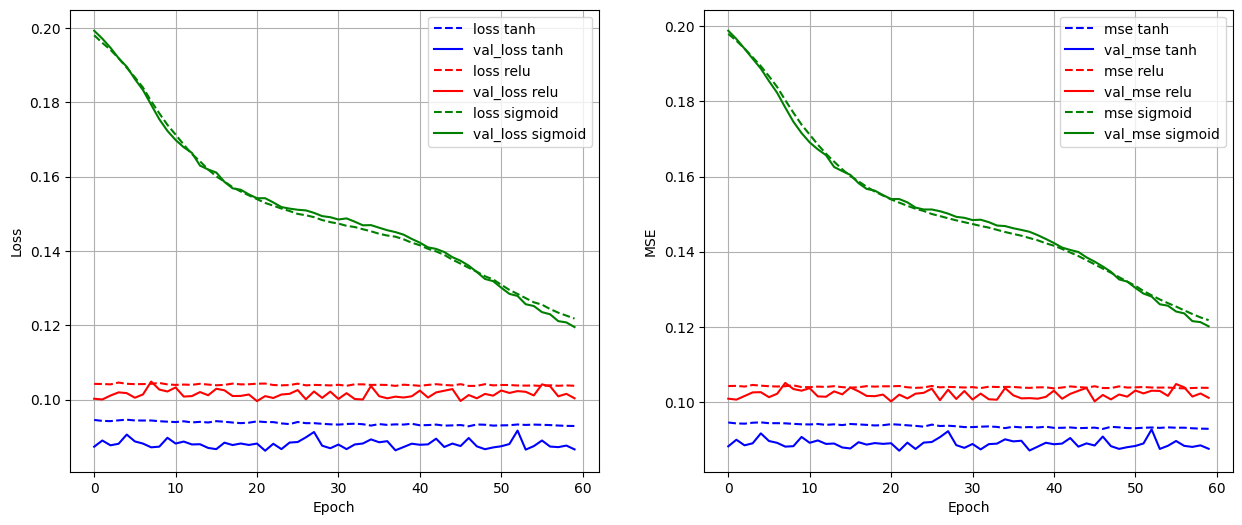

In [5]:
# print the results
fig = plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(historytanh.history['loss'], label = 'loss tanh', color = 'blue', linestyle = '--')
plt.plot(historytanh.history['val_loss'], label = 'val_loss tanh', color = 'blue')
plt.plot(historyrelu.history['loss'], label = 'loss relu', color = 'red', linestyle = '--')
plt.plot(historyrelu.history['val_loss'], label = 'val_loss relu', color = 'red')
plt.plot(historysigmoid.history['loss'], label = 'loss sigmoid', color = 'green', linestyle = '--')
plt.plot(historysigmoid.history['val_loss'], label = 'val_loss sigmoid', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(historytanh.history['mse'], label = 'mse tanh', color = 'blue', linestyle = '--')
plt.plot(historytanh.history['val_mse'], label = 'val_mse tanh', color = 'blue')
plt.plot(historyrelu.history['mse'], label = 'mse relu', color = 'red', linestyle = '--')
plt.plot(historyrelu.history['val_mse'], label = 'val_mse relu', color = 'red')
plt.plot(historysigmoid.history['mse'], label = 'mse sigmoid', color = 'green', linestyle = '--')
plt.plot(historysigmoid.history['val_mse'], label = 'val_mse sigmoid', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.show()



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


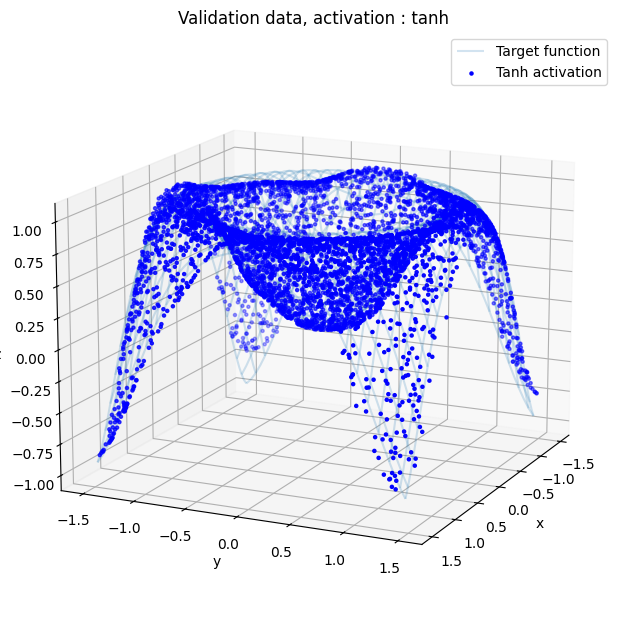

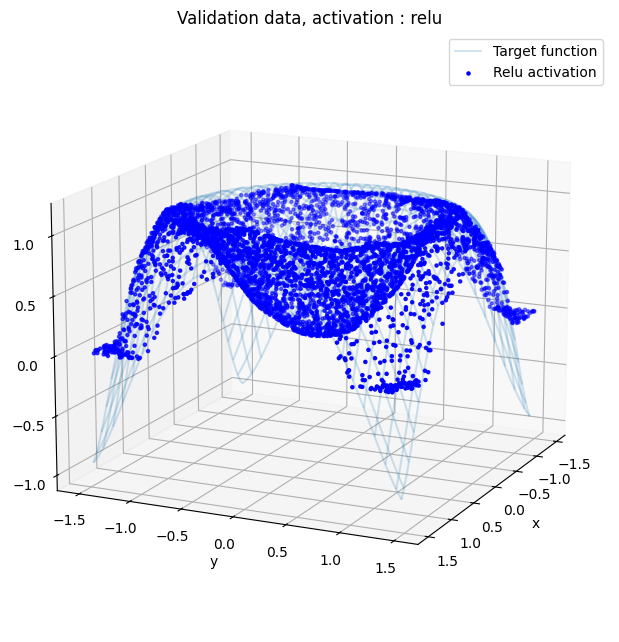

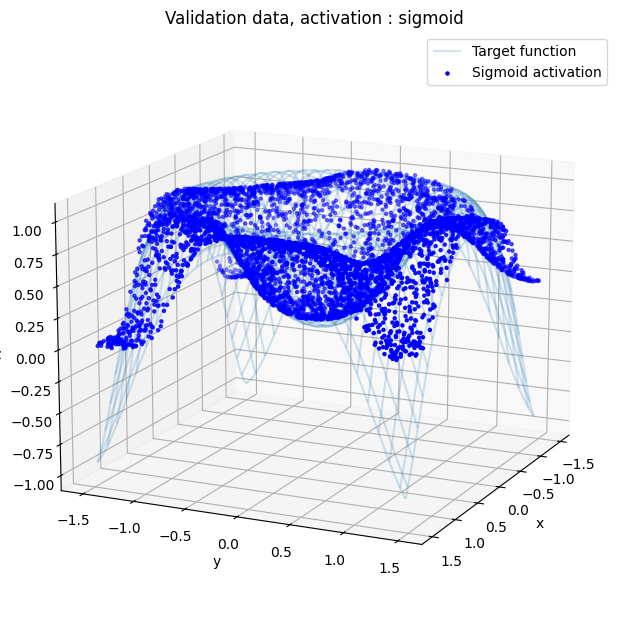

In [6]:
x_predicted = np.random.uniform(-3./2, 3./2, 5000) 
y_predicted = np.random.uniform(-3./2, 3./2, 5000) 
pair_predicted = np.column_stack((x_predicted, y_predicted))
z_tanh = modeltanh.predict(pair_predicted)
z_relu = modelrelu.predict(pair_predicted)
z_sigmoid = modelsigmoid.predict(pair_predicted)
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    label = 'Target function',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_tanh, marker = ".", color = "b", label = 'Tanh activation')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data, activation : tanh")
ax.legend()
ax.view_init(15, 25)
plt.show()

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    label = 'Target function',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_relu, marker = ".", color = "b", label = 'Relu activation')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data, activation : relu")
ax.legend()
ax.view_init(15, 25)
plt.show()

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    label = 'Target function',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_sigmoid, marker = ".", color = "b", label = 'Sigmoid activation')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data, activation : sigmoid")
ax.legend()
ax.view_init(15, 25)
plt.show()
